In [1]:
%matplotlib inline
from collections import defaultdict

import matplotlib.pylab as plt
from skimpy import skim
import numpy as np
import pandas as pd
from IPython.display import display, HTML
import seaborn as sns

from tqdm import tqdm

In [2]:

import tensorflow as tf
import tensorflow_probability as tfp

from bayesianquilts.models.logistic_regression import LogisticRegression
from bayesianquilts.metrics.classification import classification_metrics

2024-01-26 16:10:18.496908: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-26 16:10:18.523155: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-26 16:10:18.523185: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-26 16:10:18.524402: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-26 16:10:18.529532: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-26 16:10:18.529889: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [3]:
print(tf.__version__, tfp.__version__)

2.15.0 0.23.0


# Load the dataset

Using the example from here: https://www.tensorflow.org/guide/core/logistic_regression_core

In [4]:
from ucimlrepo import fetch_ucirepo 


In [5]:
# fetch dataset 
cdc_diabetes_health_indicators = fetch_ucirepo(id=891) 
  
# data (as pandas dataframes) 
X = cdc_diabetes_health_indicators.data.features 
y = cdc_diabetes_health_indicators.data.targets 

In [6]:
X_scaled = (X - X.min())/X.max()
n = X_scaled.shape[0]
p = X_scaled.shape[1]

print((n, p))

(253680, 21)


Instantiate the model object

In [7]:
lr_model = LogisticRegression(dim_regressors=p)

Set up Bayesian minibatch ADVI inference

In [8]:
batch_size = 1057


In [9]:
tfdata = tf.data.Dataset.from_tensor_slices({'X': X_scaled, 'y':y})

def data_factory():
    out = tfdata.shuffle(batch_size*10).batch(batch_size)
    return out

In [10]:
losses = lr_model.fit(
    data_factory,
    dataset_size=n,
    batches_per_step=1,
    check_every=int(n/batch_size),
    batch_size=batch_size,
    num_steps=4000,
    max_decay_steps=100,
    max_plateau_epochs=100,
    sample_size=32,
    learning_rate=0.0015)

Running optimization for 4000 steps of 1 accumulated batches, checking every 240 steps
Saved a checkpoint: /tmp/tfcheckpoints/b4d67eba-81c5-4b05-891c-c7882ca58cfa/b4d67eba-81c5-4b05-891c-c7882ca58cfa-1


  6%|▌         | 234/4000 [00:03<00:43, 86.58it/s]

Step 240: average-batch loss:424.7773923130102 rel loss: 2.354174252435543e+305
Saved a checkpoint: /tmp/tfcheckpoints/b4d67eba-81c5-4b05-891c-c7882ca58cfa/b4d67eba-81c5-4b05-891c-c7882ca58cfa-2


 12%|█▏        | 477/4000 [00:06<00:41, 85.70it/s]

Step 480: average-batch loss:415.56618667350796 rel loss: 0.022165435819587177
Saved a checkpoint: /tmp/tfcheckpoints/b4d67eba-81c5-4b05-891c-c7882ca58cfa/b4d67eba-81c5-4b05-891c-c7882ca58cfa-3


 18%|█▊        | 711/4000 [00:08<00:38, 84.71it/s]

Step 720: average-batch loss:405.3671423016025 rel loss: 0.025160017444919473
Saved a checkpoint: /tmp/tfcheckpoints/b4d67eba-81c5-4b05-891c-c7882ca58cfa/b4d67eba-81c5-4b05-891c-c7882ca58cfa-4


 24%|██▍       | 954/4000 [00:11<00:36, 84.45it/s]

Step 960: average-batch loss:403.3502488866344 rel loss: 0.005000352474146976
Saved a checkpoint: /tmp/tfcheckpoints/b4d67eba-81c5-4b05-891c-c7882ca58cfa/b4d67eba-81c5-4b05-891c-c7882ca58cfa-5


 30%|██▉       | 1197/4000 [00:14<00:32, 86.47it/s]

Step 1200: average-batch loss:400.7514448878941 rel loss: 0.00648482752062768
Saved a checkpoint: /tmp/tfcheckpoints/b4d67eba-81c5-4b05-891c-c7882ca58cfa/b4d67eba-81c5-4b05-891c-c7882ca58cfa-6


 36%|███▌      | 1431/4000 [00:17<00:29, 86.50it/s]

Step 1440: average-batch loss:381.10425174916844 rel loss: 0.05155332969535287
Saved a checkpoint: /tmp/tfcheckpoints/b4d67eba-81c5-4b05-891c-c7882ca58cfa/b4d67eba-81c5-4b05-891c-c7882ca58cfa-7


 42%|████▏     | 1674/4000 [00:20<00:27, 85.82it/s]

Step 1680: average-batch loss:404.1647819695962 rel loss: 0.05705724805622112
New learning rate: <tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0015>


 48%|████▊     | 1917/4000 [00:22<00:23, 87.09it/s]

Step 1920: average-batch loss:410.0351114409613 rel loss: 0.07055703007999223
New learning rate: <tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0015>


 54%|█████▍    | 2151/4000 [00:25<00:21, 86.41it/s]

Step 2160: average-batch loss:393.2412947766459 rel loss: 0.03086411114166191
New learning rate: <tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0015>


 60%|█████▉    | 2394/4000 [00:28<00:18, 85.69it/s]

Step 2400: average-batch loss:400.73001382973916 rel loss: 0.04897502408918453
New learning rate: <tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0015>


 66%|██████▌   | 2637/4000 [00:31<00:15, 85.83it/s]

Step 2640: average-batch loss:406.3615928567905 rel loss: 0.06215484325193893
New learning rate: <tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0015>
We are in a loss plateau
Restoring from a checkpoint


 72%|███████▏  | 2871/4000 [00:34<00:13, 86.03it/s]

Step 2880: average-batch loss:386.87593946616 rel loss: 0.01491870423618422
New learning rate: <tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0015>
We are in a loss plateau
Restoring from a checkpoint


 78%|███████▊  | 3114/4000 [00:36<00:10, 85.92it/s]

Step 3120: average-batch loss:403.8969251130873 rel loss: 0.05643190612935998
New learning rate: <tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0015>
We are in a loss plateau
Restoring from a checkpoint


 84%|████████▍ | 3357/4000 [00:39<00:07, 85.23it/s]

Step 3360: average-batch loss:378.38315801444037 rel loss: 0.007191371172562141
Saved a checkpoint: /tmp/tfcheckpoints/b4d67eba-81c5-4b05-891c-c7882ca58cfa/b4d67eba-81c5-4b05-891c-c7882ca58cfa-8


 90%|████████▉ | 3591/4000 [00:42<00:04, 85.22it/s]

Step 3600: average-batch loss:398.06723607759386 rel loss: 0.049449128888659766
New learning rate: <tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0015>


 96%|█████████▌| 3834/4000 [00:45<00:01, 86.06it/s]

Step 3840: average-batch loss:394.7627080258354 rel loss: 0.0414921411733833
New learning rate: <tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0015>


100%|█████████▉| 3996/4000 [00:47<00:00, 86.26it/s]

Terminating because we are out of iterations


100%|██████████| 4000/4000 [00:47<00:00, 84.70it/s]


In [11]:
test_batch = next(iter(data_factory()))
param_test = lr_model.sample(24)

In [1]:
def adaptive_is_loo(self, data, params, h):
    """Compute step-away transformation for LOO
    Keyword arguments:
    argument -- description
    Return: return_description
    """
    
    y = tf.cast(tf.squeeze(data['y']), tf.float64)
    X = tf.cast(data['X'], tf.float64)
    mu = tf.reduce_sum(params['beta__']*data['X'], axis=-1) + params['intercept__'][..., 0]
    sigma = tf.math.sigmoid(mu)
    
    # Standard LOO
    
    ell = (y*(sigma)+(1-y)*(1-sigma))
    nu_weights = 1/ell
    nu_weights = nu_weights/tf.reduce_sum(nu_weights, keepdims=True)
    p_loo = tf.reduce_sum(sigma*nu_weights, axis=0)
    ll_loo = tf.reduce_sum(nu_weights*ell, axis=0)
    
    # Common
    
    log_ell_prime = tf.cast(y, tf.float64)*tf.cast(1-sigma, tf.float64)-tf.cast(1-y, tf.float64)*tf.cast(sigma, tf.float64)
    log_ell_doubleprime = -tf.cast(1-sigma, tf.float64)*tf.cast(sigma, tf.float64)
    
    log_pi_beta0 = self.surrogate_distribution.model['beta__'].log_prob( self.surrogate_distribution.model['beta__'].mean())
    log_pi_beta = self.surrogate_distribution.model['beta__'].log_prob(params['beta__']) - log_pi_beta0
    log_pi_intercept0 = self.surrogate_distribution.model['intercept__'].log_prob( self.surrogate_distribution.model['intercept__'].mean())
    log_pi_intercept= self.surrogate_distribution.model['intercept__'].log_prob(params['intercept__']) - log_pi_intercept0
    log_pi = log_pi_beta + log_pi_intercept
    
    # scaled (theta - bar(theta))/Sigma
    delta_beta = params['beta__'] - self.surrogate_distribution.model['beta__'].mean()
    delta_beta = delta_beta/self.surrogate_distribution.model['beta__'].variance()
    delta_intercept = params['intercept__'] - self.surrogate_distribution.model['intercept__'].mean()
    delta_intercept = delta_intercept/self.surrogate_distribution.model['intercept__'].variance()
    
    # log-likelihood descent

    
    def J_ll(sigma):
        return 1 + h*(1 + tf.math.reduce_sum(X*X, -1))*sigma*(1-sigma)
    
    def T_ll(beta, intercept):
        beta_ll = params['beta__'] - h*log_ell_prime[..., tf.newaxis] * X
        intercept_ll = params['intercept__'] - h*log_ell_prime[..., tf.newaxis]
        return beta_ll, intercept_ll
        
    def IS(beta, intercept, Q, jacobian):
        beta_new, intercept_new = Q(beta, intercept)
        mu_new= tf.reduce_sum(beta_new*data['X'], axis=-1) + intercept_new[..., 0]
        sigma_new = tf.math.sigmoid(mu_new)
        
        nu_new = (y*(sigma_new)+(1-y)*(1-sigma_new))**-1
        J = jacobian(sigma)
        log_beta_new = self.surrogate_distribution.model['beta__'].log_prob(beta_new[..., tf.newaxis, :]) - log_pi_beta0
        log_intercept_new = self.surrogate_distribution.model['intercept__'].log_prob(intercept_new[..., tf.newaxis, :]) - log_pi_intercept0

        eta = nu_new*J*tf.math.exp(log_beta_new + log_intercept_new - log_pi_beta[:, tf.newaxis] - log_pi_intercept[:, tf.newaxis])
        eta_weights = eta/tf.reduce_sum(eta, axis=0, keepdims=True)
        p_loo_new = tf.reduce_sum(sigma_new * eta_weights, axis=0)
        p_loo_sd = tf.math.reduce_std(sigma_new * eta_weights, axis=0)
        ll_loo_new = tf.reduce_sum(eta_weights/nu_new, axis=0)
        ll_loo_sd = tf.math.reduce_std(eta_weights/nu_new, axis=0)
        return eta_weights, p_loo_new, p_loo_sd, ll_loo_new, ll_loo_sd
    
    eta_ll, p_loo_ll, p_loo_ll_sd, ll_loo_ll, ll_loo_ll_sd = IS(params['beta__'], params['intercept__'], T_ll, J_ll)
    
    def T_kl(beta, intercept):
        beta_kl = beta + h*tf.math.exp(log_pi)[..., tf.newaxis, tf.newaxis]*log_ell_prime[..., tf.newaxis] * X/ell[..., tf.newaxis]
        intercept_kl = intercept + h*tf.math.exp(log_pi)[..., tf.newaxis, tf.newaxis]*log_ell_prime[..., tf.newaxis]/ell[..., tf.newaxis]
        return beta_kl, intercept_kl
    
    def J_kl(sigma):
        dQ = tf.math.exp(log_pi)[..., tf.newaxis]/ell * (
            (log_ell_prime**2 - log_ell_doubleprime)*(1 + tf.math.reduce_sum(X*X, -1)) + log_ell_prime*(delta_intercept[:, :, 0] + tf.reduce_sum(delta_beta*X, axis=-1, keepdims=False))
            )
        return 1 + h*dQ
    # kl descent

    eta_kl, p_loo_kl, p_loo_kl_sd, ll_loo_kl, ll_loo_kl_sd = IS(params['beta__'], params['intercept__'], T_kl, J_kl)
    
    # variance descent -(log ell)'/l
    
    def T_var(beta, intercept):
        beta_step = tf.math.exp(log_pi)*(
            (sigma/ell)**2*(delta_intercept -delta_intercept + (1-sigma) - log_ell_prime
            )
        )
        intercept_step = tf.math.exp(log_pi)*(
            (sigma/ell)**2*delta_intercept -delta_intercept + (1-sigma) - log_ell_prime
            )
        return beta + h*beta_step, intercept + h*intercept_step
    
    def J_var(beta, intercept):
        dQ = 0
        return 1 + h*dQ
    
    eta_var, p_loo_var, p_loo_var_sd, ll_loo_var, ll_loo_var_sd = IS(params['beta__'], params['intercept__'], T_var, J_var)

    return {
        'eta_weights': eta_ll, 
        'p': tf.reduce_mean(sigma, axis=0),
        'nu_weights': nu_weights,
        'p_loo': p_loo,
        'p_loo_ll': p_loo_ll,
        'll_loo_ll': ll_loo_ll,
        'll_loo': ll_loo,
        'sigma': sigma,

        }
    
adaptive_is_loo(lr_model, test_batch, param_test, 0.0001)

NameError: name 'lr_model' is not defined

# Compute LOO AU ROC/PRC

In [ ]:
step_size = 1/253680
def prediction_fn_stepaway(data):
    params = lr_model.sample(100)
    loo = lr_model.adaptive_is_loo(data, params, step_size)
    return loo['']

def prediction_fn_loo(data):
    params = lr_model.sample(100)
    pred = lr_model.adaptive_is_loo(data, params, step_size)['p_loo']
    return pred

def prediction_fn(data):
    params = lr_model.sample(100)
    pred = lr_model.adaptive_is_loo(data, params, step_size)['p']
    return pred

In [ ]:
bench_stepaway_loo = classification_metrics(
    data_factory=data_factory,
    prediction_fn=prediction_fn_stepaway,
    outcome_label='y',
    by_vars=[]
)

bench_loo = classification_metrics(
    data_factory=data_factory,
    prediction_fn=prediction_fn_loo,
    outcome_label='y',
    by_vars=[]
)

bench = classification_metrics(
    data_factory=data_factory,
    prediction_fn=prediction_fn,
    outcome_label='y',
    by_vars=[]
)

KeyError: 'p_loo_stepaway'

Step-away LOO

(0.0, 1.0)

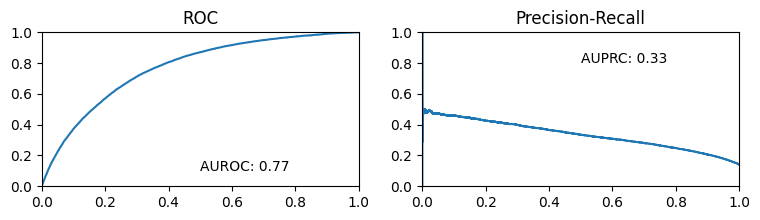

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(9, 2))
ax[0].plot(bench_stepaway_loo['auroc']['fpr'], bench_stepaway_loo['auroc']['tpr'])
ax[0].text(0.5, 0.1, f"AUROC: {round(bench_stepaway_loo['auroc']['auroc'], 2)}")
ax[0].set_xlim((0, 1))
ax[0].set_ylim((0, 1))
ax[0].set_title("ROC")

ax[1].plot(bench_stepaway_loo['auprc']['recall'], bench_stepaway_loo['auprc']['precision'])
ax[1].text(0.5, 0.8, f"AUPRC: {round(bench_stepaway_loo['auprc']['auprc'], 2)}")
ax[1].set_title("Precision-Recall")
ax[1].set_xlim((0, 1))
ax[1].set_ylim((0, 1))

LOO w/o stepaway

(0.0, 1.0)

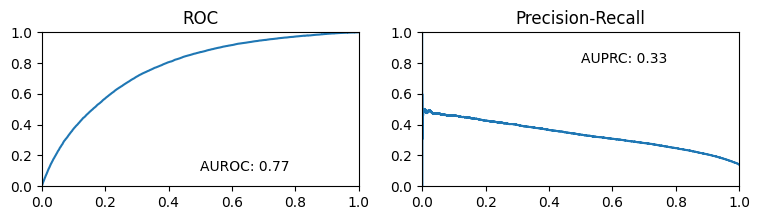

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(9, 2))
ax[0].plot(bench_loo['auroc']['fpr'], bench_loo['auroc']['tpr'])
ax[0].text(0.5, 0.1, f"AUROC: {round(bench_loo['auroc']['auroc'], 2)}")
ax[0].set_xlim((0, 1))
ax[0].set_ylim((0, 1))
ax[0].set_title("ROC")

ax[1].plot(bench_loo['auprc']['recall'], bench_loo['auprc']['precision'])
ax[1].text(0.5, 0.8, f"AUPRC: {round(bench_loo['auprc']['auprc'], 2)}")
ax[1].set_title("Precision-Recall")
ax[1].set_xlim((0, 1))
ax[1].set_ylim((0, 1))

Training data metrics

(0.0, 1.0)

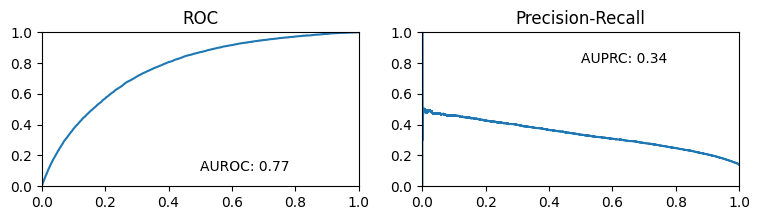

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(9, 2))
ax[0].plot(bench['auroc']['fpr'], bench['auroc']['tpr'])
ax[0].text(0.5, 0.1, f"AUROC: {round(bench['auroc']['auroc'], 2)}")
ax[0].set_xlim((0, 1))
ax[0].set_ylim((0, 1))
ax[0].set_title("ROC")

ax[1].plot(bench['auprc']['recall'], bench['auprc']['precision'])
ax[1].text(0.5, 0.8, f"AUPRC: {round(bench['auprc']['auprc'], 2)}")
ax[1].set_title("Precision-Recall")
ax[1].set_xlim((0, 1))
ax[1].set_ylim((0, 1))

In [ ]:
bench['auroc']['auroc']

0.7706678999899712

In [ ]:
params = lr_model.sample(128)
loo_out = []
for batch in tqdm(iter(data_factory())):
    loo_out += [lr_model.adaptive_loo(batch, params, step_size)]

240it [00:10, 22.86it/s]


In [ ]:
eta = np.concatenate([t['eta_weights'] for t in loo_out], axis=-1)
nu = np.concatenate([t['nu_weights'] for t in loo_out], axis=-1)
p_loo = np.concatenate([t['nu_weights']*t['sigma'] for t in loo_out], axis=-1)
p_loo_stepaway = np.concatenate([t['eta_weights']*t['sigma_stepaway'] for t in loo_out], axis=-1)


In [ ]:
eta_sd = tf.math.reduce_std(eta, axis=0)
nu_sd = tf.math.reduce_std(nu, axis=0)
p_loo_sd = tf.math.reduce_std(p_loo, axis=0)
p_loo_stepaway_sd = tf.math.reduce_std(p_loo_stepaway, axis=0)


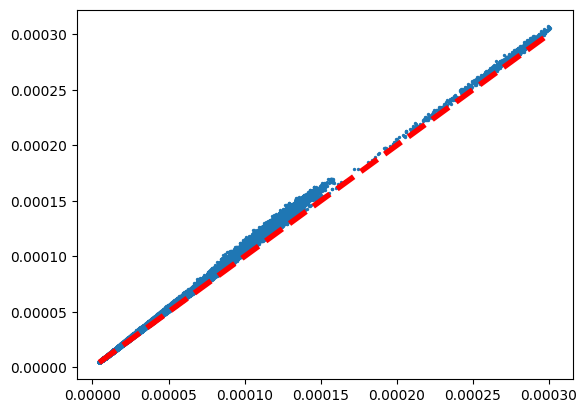

In [ ]:
plt.scatter(eta_sd, nu_sd, s=2)
x = np.linspace(min(eta_sd), max(eta_sd), 100)
plt.plot(x, x, linestyle='dashed', color='red', linewidth=4)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f2c4821d150>,
 'caps': [<matplotlib.lines.Line2D at 0x7f2c4821d690>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f2c4821ceb0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f2c4821dbd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f2c4821de70>],
 'means': []}

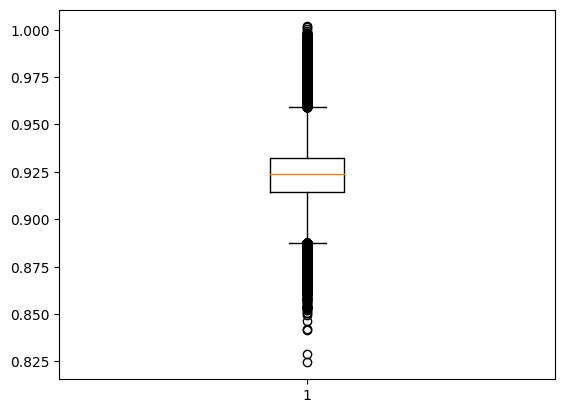

In [ ]:
plt.boxplot(eta_sd/nu_sd)

{'bodies': [<matplotlib.collections.PolyCollection at 0x7f2c5005fca0>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x7f2c5005f9d0>,
 'cmins': <matplotlib.collections.LineCollection at 0x7f2c5005eef0>,
 'cbars': <matplotlib.collections.LineCollection at 0x7f2c485567d0>}

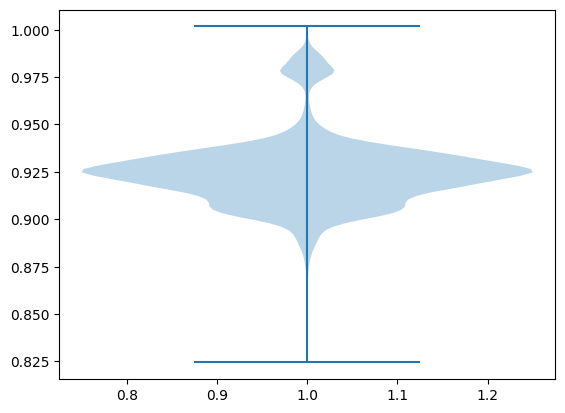

In [ ]:
plt.violinplot(eta_sd/nu_sd)

In [ ]:
tf.reduce_sum(tf.cast(p_loo_stepaway_sd/p_loo_sd < 1.0, tf.float32))/n

<tf.Tensor: shape=(), dtype=float32, numpy=0.860667>

In [ ]:
1/253680

3.941974140649637e-06

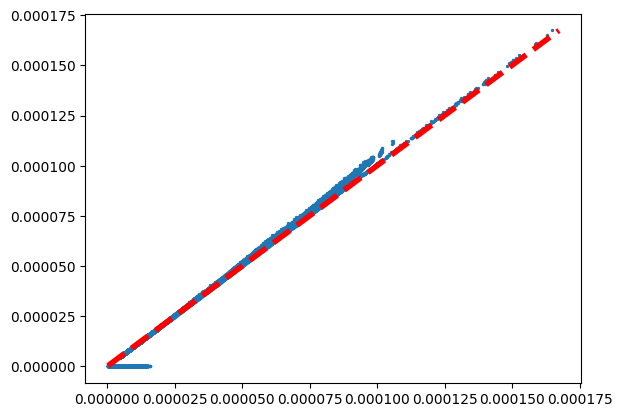

In [ ]:
plt.scatter(p_loo_stepaway_sd, p_loo_sd, s=2)
x = np.linspace(min(p_loo_stepaway_sd), max(p_loo_sd), 100)
plt.plot(x, x, linestyle='dashed', color='red', linewidth=4)